# Using Naive Bayes to classify diabetes

In [2]:
# Using Naive Bayes to classify diabetes
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [3]:
# Load dataset
dataset = pd.read_csv('../dataset/diabetes_selected_norm.csv')

In [4]:
# Split dataset into training and test set
X = dataset.iloc[:, 0:len(dataset.columns)-1].values
y = dataset.iloc[:, len(dataset.columns)-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# Build model
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [6]:
# Predict
y_pred = classifier.predict(X_test)

Accuracy:  0.7463768115942029
Precision:  0.8488372093023255
Recall:  0.7684210526315789
F1 score:  0.8066298342541437


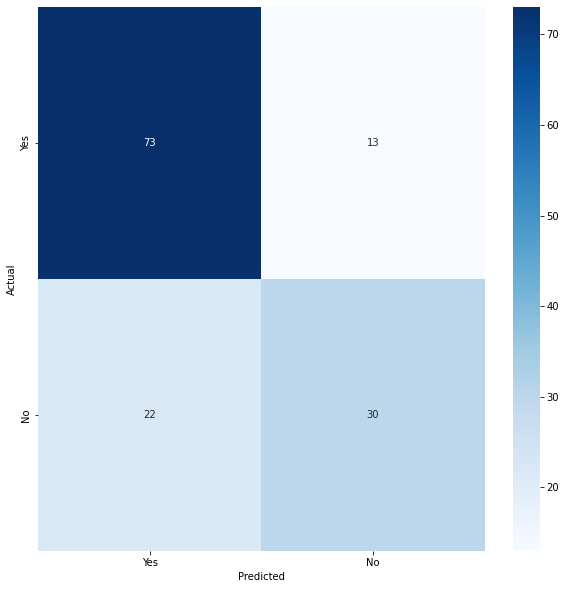

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        86
           1       0.70      0.58      0.63        52

    accuracy                           0.75       138
   macro avg       0.73      0.71      0.72       138
weighted avg       0.74      0.75      0.74       138



In [7]:
# Evaluate model
cm = confusion_matrix(y_test, y_pred)
# Accuracy
print('Accuracy: ', (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
# Precision
print('Precision: ', cm[0][0] / (cm[0][0] + cm[0][1]))
# Recall
print('Recall: ', cm[0][0] / (cm[0][0] + cm[1][0]))
# F1 score
print('F1 score: ', 2 * cm[0][0] / (2 * cm[0][0] + cm[0][1] + cm[1][0]))

# Visualize confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
fig, ax = plt.subplots(figsize=(10,10))
# Set up the matplotlib figure
sns.heatmap(cm,  cmap='Blues', annot=True, fmt='d',
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

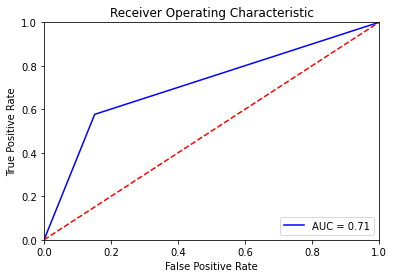

In [8]:
# Plot AUC
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()